In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# **Loading Libraries and Dataset**

In [2]:
#importing libarires
import numpy as np
import h5py

In [3]:
#redaing h5py dataset
data=h5py.File('/content/drive/My Drive/Autonomous_Vehicles.h5','r')

# **Understanding of data**

In [4]:
#printing keys
data.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [5]:
data.close()

# **Data Preprocessing**

In [6]:
#splitting dataset into training and testing
import h5py

# Open the HDF5 file
with h5py.File('/content/drive/My Drive/Autonomous_Vehicles.h5', 'r') as hdf_file:
    # Load the datasets
    X_train = hdf_file['X_train'][:]
    X_test = hdf_file['X_test'][:]
    y_train = hdf_file['y_train'][:]
    y_test = hdf_file['y_test'][:]


In [7]:
#printing shape of training and testing data
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (42000, 32, 32)
X_test shape: (18000, 32, 32)
y_train shape: (42000,)
y_test shape: (18000,)


# **Data Visualization**

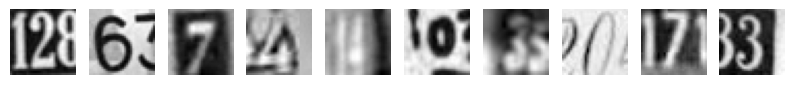

label for each of the above image:[2 6 7 4 4 0 3 0 7 3]


In [8]:
#visualizing first 10 images in the dataset and their labels.
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,1))
for i in range(10):
  plt.subplot(1,10,i+1)
  plt.imshow(X_train[i],cmap='gray')
  plt.axis('off')
plt.show()
print('label for each of the above image:%s' %(y_train[0:10]))


# **Model Building**

In [9]:

#flatten the images
image_vector_size=32*32
X_train=X_train.reshape(X_train.shape[0],image_vector_size)
X_test=X_test.reshape(X_test.shape[0],image_vector_size)

#normalize inputs from 0-255 to 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0

print('training set' , X_train.shape,y_train.shape)
print('testing set' , X_test.shape,y_test.shape)


training set (42000, 1024) (42000,)
testing set (18000, 1024) (18000,)


In [10]:
#convert to one-hot vectors using to_categorical function
from tensorflow.keras.utils import to_categorical
num_classes=10
y_train= to_categorical(y_train,num_classes)
y_test= to_categorical(y_test,num_classes)

In [11]:
print('first 5 training labels as one-hot encoded vectors:\n',y_train[:5])

first 5 training labels as one-hot encoded vectors:
 [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [12]:
print(y_train.shape)

(42000, 10)


In [13]:
print(y_train.shape)
classes = np.unique(y_train)

print("Classes:", classes)
print("Total number of classes:", len(classes))


(42000, 10)
Classes: [0. 1.]
Total number of classes: 2


In [14]:
# define model
from tensorflow.keras import losses
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization


In [15]:
# define model

from tensorflow.keras import losses
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

image_size=32*32
num_classes=10
# create model
model = Sequential()

model.add(Dense(256, activation='relu',kernel_initializer='he_uniform',input_shape=(image_size,))) ###Multiple Dense units with Relu activation
model.add(Dense(64, activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(64, activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))

model.add(Dense(num_classes, activation='softmax'))

In [16]:
#complie of model
adam = optimizers.Adam(lr=1e-3)
model.compile(loss=losses.categorical_crossentropy, optimizer=adam, metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               262400    
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 10)                330       
                                                                 
Total params: 285418 (1.09 MB)
Trainable params: 285418 (1.09 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
#callbacks
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
checkpoint = ModelCheckpoint("model_weights.h5",monitor='val_accuracy',
                            save_weights_only=True, mode='max',verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=2,min_lr=0.00001,model='auto')

callbacks = [checkpoint,reduce_lr]

In [19]:
#fit of model
history=model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=128, verbose=2,callbacks=callbacks)

Epoch 1/10

Epoch 1: saving model to model_weights.h5
263/263 - 3s - loss: 2.3068 - accuracy: 0.1013 - val_loss: 2.3025 - val_accuracy: 0.0942 - lr: 0.0010 - 3s/epoch - 12ms/step
Epoch 2/10

Epoch 2: saving model to model_weights.h5
263/263 - 3s - loss: 2.3027 - accuracy: 0.0989 - val_loss: 2.3028 - val_accuracy: 0.0974 - lr: 0.0010 - 3s/epoch - 10ms/step
Epoch 3/10

Epoch 3: saving model to model_weights.h5
263/263 - 2s - loss: 2.3027 - accuracy: 0.1009 - val_loss: 2.3028 - val_accuracy: 0.1014 - lr: 0.0010 - 2s/epoch - 8ms/step
Epoch 4/10

Epoch 4: saving model to model_weights.h5
263/263 - 2s - loss: 2.3025 - accuracy: 0.1021 - val_loss: 2.3028 - val_accuracy: 0.1014 - lr: 1.0000e-04 - 2s/epoch - 7ms/step
Epoch 5/10

Epoch 5: saving model to model_weights.h5
263/263 - 2s - loss: 2.3025 - accuracy: 0.1021 - val_loss: 2.3028 - val_accuracy: 0.1014 - lr: 1.0000e-04 - 2s/epoch - 7ms/step
Epoch 6/10

Epoch 6: saving model to model_weights.h5
263/263 - 2s - loss: 2.3025 - accuracy: 0.1021

In [20]:
#prediction
y_pred=model.predict(X_test)
y_pred_final=[]
for i in y_pred:
  y_pred_final.append(np.argmax(i))

563/563 [==============================] - 3s 4ms/step


In [23]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report


In [24]:
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)
y_pred_final_bin = lb.transform(y_pred_final)
#classification report
print(classification_report(y_test_bin, y_pred_final_bin))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1814
           1       0.00      0.00      0.00      1828
           2       0.00      0.00      0.00      1803
           3       0.10      1.00      0.17      1719
           4       0.00      0.00      0.00      1812
           5       0.00      0.00      0.00      1768
           6       0.00      0.00      0.00      1832
           7       0.00      0.00      0.00      1808
           8       0.00      0.00      0.00      1812
           9       0.00      0.00      0.00      1804

   micro avg       0.10      0.10      0.10     18000
   macro avg       0.01      0.10      0.02     18000
weighted avg       0.01      0.10      0.02     18000
 samples avg       0.10      0.10      0.10     18000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


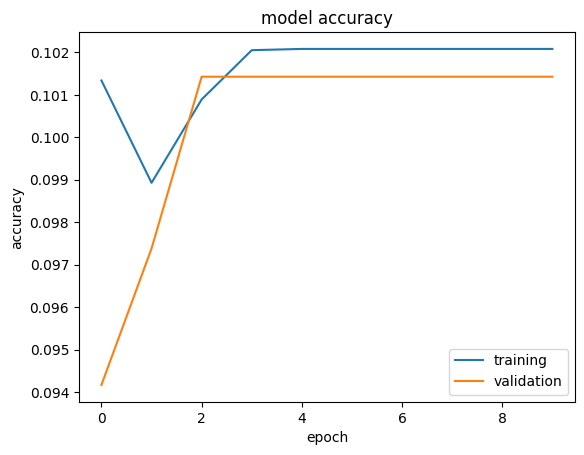

In [25]:
#accurcay curve
loss, accuracy  = model.evaluate(X_test, y_test, verbose=False)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

In [26]:
#creating model
from tensorflow.keras import losses
from tensorflow.keras import optimizers
from keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout

image_size=32*32

# create model
model_1 = Sequential()

model_1.add(Dense(256, activation='leaky_relu',kernel_initializer='glorot_uniform',input_shape=(image_size,))) ###Multiple Dense units with Relu activation
model_1.add(Dense(64, activation='leaky_relu',kernel_initializer='glorot_uniform'))
model_1.add(Dense(64, activation='leaky_relu',kernel_initializer='glorot_uniform'))## Weight Initialization
model_1.add(Dense(32, activation='leaky_relu',kernel_initializer='glorot_uniform'))
model_1.add(Dropout(0.5))
model_1.add(BatchNormalization())
model_1.add(Dense(num_classes, activation='softmax'))

In [27]:
#complie of model
from tensorflow.keras.optimizers import RMSprop
adam = optimizers.RMSprop(lr=1e-3)
model_1.compile(loss=losses.categorical_crossentropy, optimizer=adam, metrics=['accuracy'])

In [28]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               262400    
                                                                 
 dense_6 (Dense)             (None, 64)                16448     
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 batch_normalization (Batch  (None, 32)                128       
 Normalization)                                                  
                                                      

In [29]:
#callbacks
checkpoint = ModelCheckpoint("model_weights_1.h5",monitor='val_accuracy',
                            save_weights_only=True, model='max',verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=2,min_lr=0.00001,model='auto')

callbacks = [checkpoint,reduce_lr]

In [30]:
#fit of model
history=model_1.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=150, verbose=2, callbacks=callbacks)

Epoch 1/100

Epoch 1: saving model to model_weights_1.h5
224/224 - 6s - loss: 2.5887 - accuracy: 0.1034 - val_loss: 2.3088 - val_accuracy: 0.0990 - lr: 0.0010 - 6s/epoch - 25ms/step
Epoch 2/100

Epoch 2: saving model to model_weights_1.h5
224/224 - 2s - loss: 2.2669 - accuracy: 0.1546 - val_loss: 2.1074 - val_accuracy: 0.2675 - lr: 0.0010 - 2s/epoch - 10ms/step
Epoch 3/100

Epoch 3: saving model to model_weights_1.h5
224/224 - 2s - loss: 1.9386 - accuracy: 0.3043 - val_loss: 1.7204 - val_accuracy: 0.4593 - lr: 0.0010 - 2s/epoch - 9ms/step
Epoch 4/100

Epoch 4: saving model to model_weights_1.h5
224/224 - 3s - loss: 1.7566 - accuracy: 0.3864 - val_loss: 1.8149 - val_accuracy: 0.3780 - lr: 0.0010 - 3s/epoch - 12ms/step
Epoch 5/100

Epoch 5: saving model to model_weights_1.h5
224/224 - 3s - loss: 1.6241 - accuracy: 0.4427 - val_loss: 1.5541 - val_accuracy: 0.4544 - lr: 0.0010 - 3s/epoch - 15ms/step
Epoch 6/100

Epoch 6: saving model to model_weights_1.h5
224/224 - 4s - loss: 1.5387 - accu

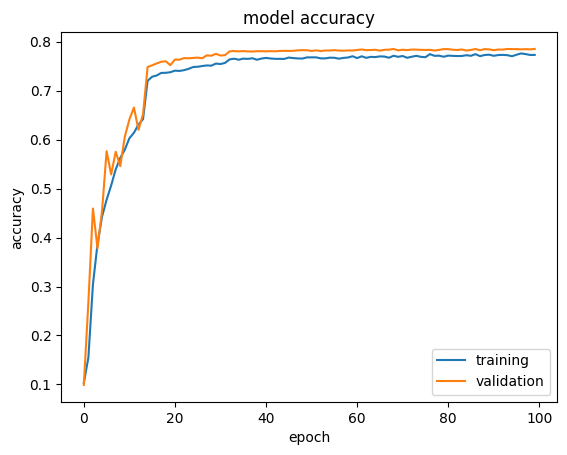

In [31]:
#model acuurcay curve
loss, accuracy  = model_1.evaluate(X_test, y_test, verbose=False)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

**Conclusion**

Our project tackled the challenging task of recognizing multi-digit numbers in street-level photographs using neural network models. Leveraging the Street View House Numbers (SVHN) dataset, we aimed to transcribe address numbers accurately despite various challenges such as diverse fonts, colors, orientations, and environmental factors.

After thorough experimentation, we found that our  neural network model outperformed others in terms of accuracy. With an accuracy of [77%], our model demonstrates its capability to accurately transcribe numbers from street-level images, surpassing baseline performance.

Moving forward, deploying this model could enhance the efficiency and accuracy of map-making processes, offering valuable insights for OCR and computer vision applications. Overall, our project highlights the effectiveness of neural network models in addressing real-world image recognition challenges.